In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
import tensorflow as tf

In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [12]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [13]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

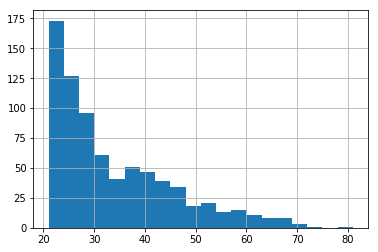

In [15]:
diabetes['Age'].hist(bins=20)

In [16]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [17]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep, insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [18]:
# TRAIN TEST SPLIT

In [19]:
x_data = diabetes.drop('Class',axis=1)

In [20]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [21]:
labels = diabetes['Class']

In [26]:
# labels

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3, random_state=101)

In [30]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [31]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': 'worker', '_model_dir': 'C:\\Users\\ptdem\\AppData\\Local\\Temp\\tmpgphciz93', '_save_checkpoints_steps': None, '_train_distribute': None, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_task_id': 0, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_is_chief': True, '_master': '', '_session_config': None, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028D744AD198>, '_num_worker_replicas': 1, '_tf_random_seed': None, '_evaluation_master': '', '_service': None, '_device_fn': None}


In [32]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ptdem\AppData\Local\Temp\tmpgphciz93\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 195.439
INFO:tensorflow:loss = 6.6916676, step = 101 (0.515 sec)
INFO:tensorflow:global_step/sec: 419.1
INFO:tensorflow:loss = 4.8372426, step = 201 (0.245 sec)
INFO:tensorflow:global_step/sec: 457.847
INFO:tensorflow:loss = 3.1164591, step = 301 (0.210 sec)
INFO:tensorflow:global_step/sec: 421.293
INFO:tensorflow:loss = 5.033875, step = 401 (0.240 sec)
INFO:tensorflow:global_step/sec: 289.79
INFO:tensorflow:loss = 7.832063, step = 501 (0.342 sec)
INFO:tensorflow:global_step/sec: 429.523
INFO:tensorflow:loss = 4.433988, step = 601 (0.232 sec)
INFO:tensorflow:global_step/sec: 42

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [34]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-03-18-08:35:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ptdem\AppData\Local\Temp\tmpgphciz93\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2025-03-18-08:35:01
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.79658437, auc_precision_recall = 0.63527477, average_loss = 0.5284331, global_step = 1000, label/mean = 0.35064936, loss = 5.086169, precision = 0.6666667, prediction/mean = 0.33090416, recall = 0.44444445
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\ptdem\AppData\Local\Temp\tmpgphciz93\model.ckpt-1000


In [35]:
results

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79658437,
 'auc_precision_recall': 0.63527477,
 'average_loss': 0.5284331,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.086169,
 'precision': 0.6666667,
 'prediction/mean': 0.33090416,
 'recall': 0.44444445}

In [37]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)


In [38]:
predictions = model.predict(pred_input_func)

In [39]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ptdem\AppData\Local\Temp\tmpgphciz93\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [40]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.47218722], dtype=float32),
  'logits': array([-0.11136609], dtype=float32),
  'probabilities': array([0.5278128 , 0.47218722], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5831235], dtype=float32),
  'logits': array([0.33560896], dtype=float32),
  'probabilities': array([0.4168765, 0.5831235], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33657888], dtype=float32),
  'logits': array([-0.6785774], dtype=float32),
  'probabilities': array([0.6634211 , 0.33657888], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.27792406], dtype=float32),
  'logits': array([-0.9547824], dtype=float32),
  'probabilities': array([0.72207594, 0.27792406], dtype=float32)},
 {'class_i

In [41]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': 'worker', '_model_dir': 'C:\\Users\\ptdem\\AppData\\Local\\Temp\\tmpghiqcwu8', '_save_checkpoints_steps': None, '_train_distribute': None, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_task_id': 0, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_is_chief': True, '_master': '', '_session_config': None, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028D74C4B278>, '_num_worker_replicas': 1, '_tf_random_seed': None, '_evaluation_master': '', '_service': None, '_device_fn': None}


In [42]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [43]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep, insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [44]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [49]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': 'worker', '_model_dir': 'C:\\Users\\ptdem\\AppData\\Local\\Temp\\tmpfoj1c5ty', '_save_checkpoints_steps': None, '_train_distribute': None, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_task_id': 0, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_is_chief': True, '_master': '', '_session_config': None, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028D74A8E128>, '_num_worker_replicas': 1, '_tf_random_seed': None, '_evaluation_master': '', '_service': None, '_device_fn': None}


In [50]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ptdem\AppData\Local\Temp\tmpfoj1c5ty\model.ckpt.
INFO:tensorflow:loss = 6.902085, step = 1
INFO:tensorflow:global_step/sec: 217.357
INFO:tensorflow:loss = 7.3409033, step = 101 (0.460 sec)
INFO:tensorflow:global_step/sec: 419.979
INFO:tensorflow:loss = 9.699525, step = 201 (0.238 sec)
INFO:tensorflow:global_step/sec: 426.49
INFO:tensorflow:loss = 6.6469016, step = 301 (0.234 sec)
INFO:tensorflow:global_step/sec: 420.175
INFO:tensorflow:loss = 8.047337, step = 401 (0.238 sec)
INFO:tensorflow:global_step/sec: 424.715
INFO:tensorflow:loss = 2.553193, step = 501 (0.235 sec)
INFO:tensorflow:global_step/sec: 426.438
INFO:tensorflow:loss = 5.457845, step = 601 (0.235 sec)
INFO:tensorflow:global_step/sec: 4

In [51]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [48]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-03-18-08:57:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ptdem\AppData\Local\Temp\tmp4hjevtb9\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2025-03-18-08:57:24
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.75757575, accuracy_baseline = 0.64935064, auc = 0.8399178, auc_precision_recall = 0.7192259, average_loss = 0.47571036, global_step = 1000, label/mean = 0.35064936, loss = 4.578712, precision = 0.64705884, prediction/mean = 0.37881336, recall = 0.67901236
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\ptdem\AppData\Local\Temp\tmp4hjevtb9\model.ckpt-1000


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8399178,
 'auc_precision_recall': 0.7192259,
 'average_loss': 0.47571036,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.578712,
 'precision': 0.64705884,
 'prediction/mean': 0.37881336,
 'recall': 0.67901236}